<a href="https://colab.research.google.com/github/reyhanalemmario/bangkit/blob/master/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First Machine Learning Bangkit Project
##"Heart Attack Prediction"
###By Rizal, Rinda and Reyhan
---
* This notebook file contains step-by-step process in solving Binary Classification problem in order to predict that someone actually has potential of getting heart attack or not by looking at Cardio column in the dataset.

* The dataset that we are using is from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset, The desription of each feature is available in that link.

* In this notebook we are trying to predict that binary value column by looking at another features in the dataset.

## Load the imports

In [0]:
#Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import sklearn.model_selection as sk
from math import floor

## Introduction to the Data

### Load the dataset

In [225]:
# Load the dataset
url = 'https://raw.githubusercontent.com/reyhanalemmario/bangkit/master/cardio.csv'
data = pd.read_csv(url, sep=';', index_col='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


There are 13 columns in this dataset, we are going to examine this columns in more detail. And notice that age column have a huge value, that's because the age unit is in days, we are going to convert that.

### Convert column age's values

In [226]:
data["age"] = data["age"]/365
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


### Data Information

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


Every features, but weight has int data type and weight feature has float datatype. So, we can continue to analyze this dataset because we have a propper data type. And last thing to notice is we don't have null value in this dataset.

### Data Description

In [16]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Data Examination and Cleaning

### Check and Remove Duplication

In [157]:
print("Number of duplicated values in dataset: {}".format(data.duplicated().sum()))

Number of duplicated values in dataset: 24


In [158]:
duplicated = data[data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
3774,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
65352,60.484932,1,175,69.0,120,80,1,1,0,0,1,1


In [227]:
# Remove the duplicated data
data.drop_duplicates(inplace=True)
print("The duplicated data is successfully removed")
print("Number of duplicated values in dataset: {}".format(data.duplicated().sum()))

The duplicated data is successfully removed
Number of duplicated values in dataset: 0


### Total rows of each label

0    34876
1    34817
Name: cardio, dtype: int64


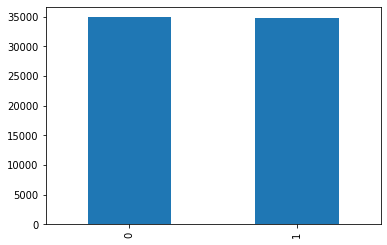

In [248]:
print(data['cardio'].value_counts())
data["cardio"].value_counts().plot(kind="bar")

As we can see, the total number of rows of each label is almost the same. This dataset have balanced dataset

### Finding anomalies

In [97]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,53.339589,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.759930,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Based on the data description, there are some anomalies in the dataset, where the min and max values are unusual. 

1.   Height
2.   Weight
3.   ap_hi
4.   ap_lo

For ap_hi, we have an assumption that the possible values are between 50 and 200.
For ap_lo, we have an assumption that the possible values are between 50 and 200.

We are going to examine them later.



## Manipulating Data

### Systolic blood pressure (ap_hi)

Based on this [source](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/blood_pressure_charts/basic_blood_pressure_chart.png), the ap_hi values is ranging from less than 120 until higher than 180. But, the possible ap_hi values that human have will be around 50-200 and that will be our assumptions for this task to set our boundaries

In [228]:
data.sort_values(["ap_hi"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
50055,63.904110,2,168,59.0,-150,80,1,1,0,0,1,1
34295,50.139726,1,162,74.0,-140,90,1,1,0,0,1,1
66571,64.783562,2,160,59.0,-120,80,1,1,0,0,0,0
36025,40.304110,2,168,50.0,-120,80,2,1,0,0,0,1
22881,60.569863,2,161,90.0,-115,70,1,1,0,0,1,0
6525,41.865753,1,165,78.0,-100,80,2,1,0,0,1,0
29313,42.687671,1,153,54.0,-100,70,1,1,0,0,1,0
60477,51.276712,1,171,80.0,1,1088,1,1,0,0,1,1
12494,46.315068,2,163,63.0,1,2088,1,1,1,0,1,0


There are negative values for ap_hi, and based on our assumptions, there are human errors when the user input this data, where the value is supposed to be positive. So we will convert the negative values with the absolute values of it.

#### Convert the negative values

In [229]:
data['ap_hi'] = abs(data['ap_hi'])
data.sort_values(["ap_hi"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
12494,46.315068,2,163,63.0,1,2088,1,1,1,0,1,0
60477,51.276712,1,171,80.0,1,1088,1,1,0,0,1,1
7657,58.191781,1,162,69.0,7,80,1,1,0,0,1,0
89703,50.284932,1,155,79.0,10,70,1,1,0,0,1,0
82646,44.257534,1,165,56.0,10,60,1,1,0,0,1,0
29827,53.487671,1,155,55.0,10,60,1,1,0,0,0,0
3683,64.232877,1,170,64.0,10,70,1,1,0,0,1,1
41674,41.917808,1,155,52.0,10,70,1,1,0,0,1,0
94673,61.783562,1,169,88.0,10,160,3,3,0,0,0,1


The negative values are successfully converted because the lowest value does not have any negative values anymore

Other than that, there are still ap_hi values that does not make sense. For example, there are rows where ap_hi values are 1 and the ap_lo is extremely high, which is thousands. So we will remove those rows

In [230]:
# Remove rows with ap_hi values = 1

data = data[data.ap_hi != 1]
data.sort_values(["ap_hi"], ascending=True).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
7657,58.191781,1,162,69.0,7,80,1,1,0,0,1,0
81051,50.249315,1,160,80.0,10,80,1,1,0,0,1,1
94673,61.783562,1,169,88.0,10,160,3,3,0,0,0,1
89703,50.284932,1,155,79.0,10,70,1,1,0,0,1,0
29827,53.487671,1,155,55.0,10,60,1,1,0,0,0,0


In [231]:
subset = data[data['ap_hi'] > 300]
subset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
2654,41.413699,1,160,60.0,902,60,1,1,0,0,1,0
2845,62.224658,2,167,59.0,906,0,1,1,0,0,1,0
6822,39.520548,1,168,63.0,909,60,2,1,0,0,1,0
11089,57.621918,1,175,80.0,11500,90,1,1,0,0,1,1
12710,51.698630,1,164,75.0,1420,80,2,1,0,0,1,1
13616,62.079452,1,155,87.0,701,110,1,1,0,0,1,1
19827,43.824658,1,168,72.0,1500,80,1,1,0,0,1,1
25314,61.364384,2,163,50.0,907,70,3,3,0,0,1,1
34120,44.194521,1,161,92.0,906,0,2,1,0,0,1,1


In [232]:
# data[(data['ap_lo'] == 80) & (data['ap_hi'] >= 50) & (data['ap_hi'] <= 200)]
# data[(data['ap_hi'] >= 50) & (data['ap_lo'] == 80)]
# for d in (data['ap_hi'] > 300):
#     print(d)

for index, row in data[data['ap_hi'] > 300].iterrows():
    while (data['ap_hi'].loc[index] > 300):
        data['ap_hi'].loc[index] = data['ap_hi'].loc[index]/10


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [233]:
data[data['ap_hi'] > 300]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


In [234]:
data.loc[67502]

age             54.057534
gender           1.000000
height         160.000000
weight          65.000000
ap_hi          140.200000
ap_lo           90.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
cardio           0.000000
Name: 67502, dtype: float64

### Diastolic blood pressure (ap_lo)


In [235]:
data.sort_values(["ap_lo"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
85816,61.838356,1,167,74.0,15.0,-70,1,1,0,0,1,1
65470,53.690411,2,165,70.0,140.0,0,3,1,1,0,1,0
39577,64.098630,2,180,73.0,140.0,0,1,1,1,1,1,1
60565,49.282192,2,176,69.0,90.6,0,1,1,0,0,1,0
36325,49.183562,2,176,73.0,12.0,0,1,1,0,0,1,0
45400,44.027397,1,170,64.0,90.7,0,1,1,0,0,1,0
75007,60.052055,1,155,66.0,13.0,0,1,1,0,0,1,0
32749,58.032877,2,166,68.0,149.0,0,1,1,0,0,1,1
91073,40.334247,2,161,61.0,117.0,0,1,1,0,0,1,0


#### Convert the negative values

In [236]:
data['ap_lo'] = abs(data['ap_lo'])
data.sort_values(["ap_lo"], ascending=True).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
65470,53.690411,2,165,70.0,140.0,0,3,1,1,0,1,0
93224,64.690411,2,176,99.0,120.0,0,1,3,0,0,1,1
91073,40.334247,2,161,61.0,117.0,0,1,1,0,0,1,0
57646,55.676712,1,162,50.0,30.9,0,1,1,0,0,1,0
54780,63.583562,2,170,81.0,148.0,0,1,1,0,0,1,0
62754,51.512329,1,164,78.0,108.0,0,2,1,0,0,1,0
68612,52.087671,1,160,84.0,121.0,0,1,1,0,0,0,1
45400,44.027397,1,170,64.0,90.7,0,1,1,0,0,1,0
34120,44.194521,1,161,92.0,90.6,0,2,1,0,0,1,1


In [237]:
data.sort_values(["ap_lo"], ascending=False).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
61901,63.619178,1,160,105.0,200.0,11000,1,1,0,0,1,1
3352,57.517808,2,186,105.0,140.0,10000,1,1,0,0,1,1
34098,49.594521,2,169,86.0,150.0,10000,2,2,0,1,1,1
97907,52.224658,1,166,70.0,160.0,10000,2,1,0,0,1,1
62058,60.016438,2,179,62.0,130.0,9800,1,1,0,0,1,0
9482,53.501370,1,162,69.0,130.0,9100,1,1,0,0,1,1
17260,58.810959,2,169,78.0,130.0,9011,1,1,1,1,1,1
47030,50.232877,1,156,65.0,150.0,9011,2,2,0,0,1,1
22832,39.747945,2,179,70.0,120.0,8500,1,1,0,0,1,0


In [238]:
data.loc[61901]

age               63.619178
gender             1.000000
height           160.000000
weight           105.000000
ap_hi            200.000000
ap_lo          11000.000000
cholesterol        1.000000
gluc               1.000000
smoke              0.000000
alco               0.000000
active             1.000000
cardio             1.000000
Name: 61901, dtype: float64

In [239]:
subset_lo = data[data['ap_lo'] > 360]
subset_lo.sort_values(["ap_lo"], ascending=False).head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
61901,63.619178,1,160,105.0,200.0,11000,1,1,0,0,1,1
97907,52.224658,1,166,70.0,160.0,10000,2,1,0,0,1,1
34098,49.594521,2,169,86.0,150.0,10000,2,2,0,1,1,1
3352,57.517808,2,186,105.0,140.0,10000,1,1,0,0,1,1
62058,60.016438,2,179,62.0,130.0,9800,1,1,0,0,1,0
9482,53.501370,1,162,69.0,130.0,9100,1,1,0,0,1,1
17260,58.810959,2,169,78.0,130.0,9011,1,1,1,1,1,1
47030,50.232877,1,156,65.0,150.0,9011,2,2,0,0,1,1
22832,39.747945,2,179,70.0,120.0,8500,1,1,0,0,1,0


In [240]:
for index, row in data[data['ap_lo'] > 360].iterrows():
    while (data['ap_lo'].loc[index] > 360):
        data['ap_lo'].loc[index] = data['ap_lo'].loc[index]/10

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [241]:
data[data['ap_lo'] > 360]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


In [242]:
data.loc[61901]

age             63.619178
gender           1.000000
height         160.000000
weight         105.000000
ap_hi          200.000000
ap_lo          110.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           1.000000
cardio           1.000000
Name: 61901, dtype: float64

In [243]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0


#### remove rows where ap_lo is higher than ap_hi

In [244]:
data[data["ap_lo"] > data["ap_hi"]]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
681,52.326027,1,156,65.0,120.0,150.0,2,1,0,0,1,0
815,58.304110,1,168,78.0,14.0,90.0,2,1,0,0,1,1
913,56.046575,2,169,68.0,70.0,110.0,1,1,0,0,1,0
1294,59.909589,2,175,70.0,14.0,90.0,3,1,0,0,1,1
1360,49.931507,1,172,65.0,11.0,80.0,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98039,58.128767,1,160,59.0,12.0,80.0,1,1,0,0,1,0
98213,51.383562,1,158,74.0,14.0,90.0,1,1,0,0,1,1
98568,52.347945,1,154,77.0,14.0,90.0,1,1,0,0,1,0


In [245]:
data.drop(data[data["ap_lo"] > data["ap_hi"]].index, inplace=True)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.391781,2,168,62.0,110.0,80.0,1,1,0,0,1,0
1,55.419178,1,156,85.0,140.0,90.0,3,1,0,0,1,1
2,51.663014,1,165,64.0,130.0,70.0,3,1,0,0,0,1
3,48.282192,2,169,82.0,150.0,100.0,1,1,0,0,1,1
4,47.873973,1,156,56.0,100.0,60.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,52.712329,2,168,76.0,120.0,80.0,1,1,1,0,1,0
99995,61.920548,1,158,126.0,140.0,90.0,2,2,0,0,1,1
99996,52.235616,2,183,105.0,180.0,90.0,3,1,0,1,0,1


## Height

In [208]:
# data = data.sort_values(["height"], ascending=False)
data.sort_values(["height"], ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9223,58.136986,1,250,86.0,140.0,100,3,1,0,0,1,1
30894,52.202740,2,207,78.0,100.0,70,1,1,0,1,1,0
59847,52.567123,2,200,100.0,170.0,1100,2,2,0,0,1,1
82105,51.572603,2,198,78.0,120.0,80,1,1,1,0,1,1
43083,63.764384,1,198,85.0,110.0,90,1,1,0,0,1,0


We have one person that has 250 cm height, I think, it is possible but we don't want out model get affected by this outlier.

In [218]:
# data = data[1:] #Remove that one outlier
data = data[data.height != 250]
data.sort_values(["height"], ascending=False).head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
30894,52.202740,2,207,78.0,100.0,70.0,1,1,0,1,1,0
59847,52.567123,2,200,100.0,170.0,110.0,2,2,0,0,1,1
4561,44.032877,2,198,61.0,110.0,70.0,1,1,0,0,1,1
82105,51.572603,2,198,78.0,120.0,80.0,1,1,1,0,1,1
17138,50.021918,2,198,102.0,110.0,70.0,1,1,0,0,1,0


In [0]:
data = data.sort_values(["height"], ascending=True)
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22723,32456,64.071233,1,55,81.0,130,90,1,1,0,0,1,1
66643,95141,51.589041,1,57,61.0,130,90,1,1,0,0,1,1
64115,91523,50.482192,1,59,57.6,125,67,1,1,0,0,0,0
29157,41661,52.295890,1,60,69.0,110,70,1,1,0,0,0,0
27603,39462,57.473973,1,64,61.0,130,70,1,1,0,0,1,0
33607,48009,53.997260,2,65,72.0,130,80,1,1,0,0,0,0
44490,63545,52.383562,1,65,60.0,120,80,1,1,0,0,1,0
64454,92008,58.487671,1,66,63.0,12,80,1,1,0,0,0,1
14323,20459,60.287671,1,67,57.0,120,90,1,1,0,0,1,1
50789,72476,39.723288,2,67,60.0,110,80,1,1,1,1,1,0


We are not really sure about people that has more weight in Kg than height in Cm. So we are going to add one more feature, BMI and we have to look to this [source](https://www.webmd.com/diet/news/20070409/morbid-obesity-bulge-gets-bigger) and filter this data based on that source. Notice that BMI has fix unit kg/m2, so we convert the height unit first and we choose Max value of BMI is 70 because it says extreme obese people has 50 or more. We assume that more than 70 BMI has an invalid values. And base on this [source](https://www.ennonline.net/fex/15/limits), it says fatal value 13 for male and 11 for female, so we choose minimum value of 12.

In [219]:
data["height"] = data["height"]/100 # Convert the height unit

data['BMI'] = data["weight"]/data["height"]**2
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
0,50.391781,2,1.68,62.0,110.0,80.0,1,1,0,0,1,0,21.967120
1,55.419178,1,1.56,85.0,140.0,90.0,3,1,0,0,1,1,34.927679
2,51.663014,1,1.65,64.0,130.0,70.0,3,1,0,0,0,1,23.507805
3,48.282192,2,1.69,82.0,150.0,100.0,1,1,0,0,1,1,28.710479
4,47.873973,1,1.56,56.0,100.0,60.0,1,1,0,0,0,0,23.011177


In [220]:
#Filtering the acceptable BMI values
data = data[data["BMI"] <= 70]
data = data[data["BMI"] >= 12]
data.sort_values(["BMI"], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
4838,39.769863,1,1.00,70.0,100.0,70.0,1,1,0,0,1,0,70.000000
52564,53.780822,1,1.61,181.0,180.0,110.0,2,1,0,0,1,1,69.827553
96921,59.624658,1,1.33,123.0,180.0,100.0,2,1,0,0,1,1,69.534739
58175,59.528767,1,1.54,162.0,120.0,80.0,1,1,0,0,1,0,68.308315
27063,42.249315,1,1.55,163.0,180.0,100.0,1,1,0,0,1,1,67.845994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14908,60.293151,1,1.62,38.0,100.0,70.0,1,1,0,0,1,0,14.479500
13518,57.419178,2,1.72,40.0,140.0,90.0,1,2,0,0,1,1,13.520822
54851,59.750685,1,1.54,32.0,110.0,60.0,1,1,0,0,1,0,13.493001


In [221]:
data = data.sort_values(["weight"], ascending=False)
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,,,,,,,,,,,,,
618,45.931507,1,1.86,200.0,130.0,70.0,1,1,0,0,0,0,57.810151
71945,41.416438,2,1.80,200.0,150.0,90.0,1,1,0,0,1,1,61.728395
87498,57.367123,2,1.80,183.0,110.0,80.0,3,3,0,1,1,1,56.481481
52564,53.780822,1,1.61,181.0,180.0,110.0,2,1,0,0,1,1,69.827553
86506,51.986301,2,1.80,180.0,140.0,100.0,3,1,0,0,1,1,55.555556
87612,45.520548,2,1.96,180.0,130.0,80.0,3,1,0,0,1,1,46.855477
64829,47.720548,2,1.90,180.0,140.0,80.0,2,2,0,0,1,1,49.861496
6716,47.172603,2,1.76,180.0,140.0,90.0,1,1,0,0,1,1,58.109504
88220,51.934247,2,1.65,178.0,120.0,80.0,1,1,0,0,1,0,65.381084


At first sight, we thought that 200 Kg is unusual but, there is a few people that has weight in that number. And look at cardio values, maybe this column will be a good feature to feed into machine learning. Now, all is good.

## Normalizing Data
To make training process more feasible, we normalize the data so the value of the features doesn't really have a significant difference.

In [222]:
data_mean = data.mean()
data_std = data.std()
data_norm = (data - data_mean)/data_std
#Cardio and gender column get affected so we replace that value with pre-normilize value
data_norm = data_norm.drop(columns='cardio')
data_norm = data_norm.drop(columns='gender')
data_norm['gender'] = data['gender']
data_norm['cardio'] = data['cardio']
data_norm.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,gender,cardio
id,,,,,,,,,,,,,
618,-1.095930,2.706877,8.768024,0.182789,-1.141449,-0.539475,-0.395865,-0.310912,-0.238410,-2.023598,5.736795,1,0
71945,-1.763848,1.954983,8.768024,1.291843,0.826540,-0.539475,-0.395865,-0.310912,-0.238410,0.494162,6.478333,2,1
87498,0.595752,1.954983,7.583138,-0.926265,-0.157455,2.400094,3.097852,-0.310912,4.194394,0.494162,5.485340,2,1
52564,0.065227,-0.426013,7.443739,2.955424,2.794529,0.930309,-0.395865,-0.310912,-0.238410,0.494162,8.011120,1,1
86506,-0.200238,1.954983,7.374040,0.737316,1.810534,2.400094,-0.395865,-0.310912,-0.238410,0.494162,5.310106,2,1


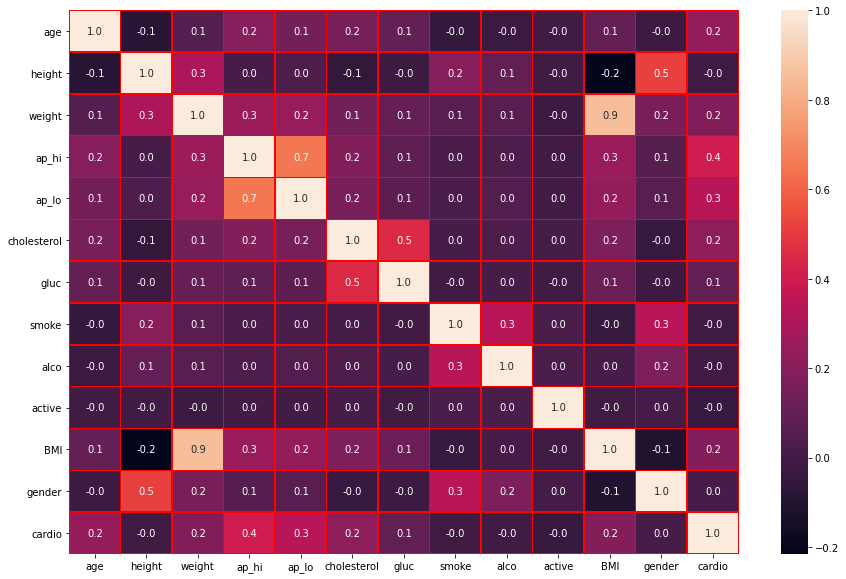

In [223]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_norm.corr(),annot=True,linewidth=0.5,linecolor='red', fmt = '.1f',ax=ax)
plt.show()

There are four features that has 0.2 correlation value to the label(cardio). And notice, at first height value doesn't really have a connection to the result but when we create BMI column, height value have a connection through BMI value.

### Define a scatter plot function

In [0]:
def plot_scatter(feature, label):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, facecolor="1.0")


In [0]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

ax.scatter(feature, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

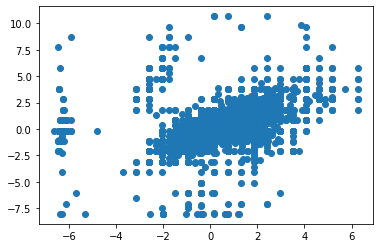

In [258]:
plt.scatter(data_norm['ap_hi'], data_norm['ap_lo'])
plt.show()

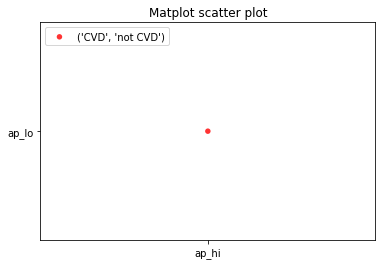

In [257]:
import numpy as np
import matplotlib.pyplot as plt

# Create data
N = 60
g1 = (0.6 + 0.6 * np.random.rand(N), np.random.rand(N))
g2 = (0.4+0.3 * np.random.rand(N), 0.5*np.random.rand(N))
g3 = (0.3*np.random.rand(N),0.3*np.random.rand(N))

data = ("ap_hi", "ap_lo")
colors = ("red", "blue")
groups = ("CVD", "not CVD")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, facecolor="1.0")

# for data, color, group in zip(data, colors, groups):
#     x, y = data

ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=groups)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()


## Represents features in feature columns

for now, the features are ap_hi and ap_lo

## Build Simple Classification Model

In [250]:
# source: binary classification MLCC, linear regression MLCC
def build_model_simple_classification(my_learning_rate, feature_layer, my_metrics):
  """Create and compile a simple classification model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the feature layer (the list of features and how they are represented)
  # to the model.
  model.add(feature_layer)

  # Describe the topography of the model.
  # Funnel the regression value through a sigmoid function
  # this model has a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,),
                                  activation=tf.sigmoid),)

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=my_metrics)

  return model   

def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  """Feed a dataset into the model in order to train it."""

  # The x parameter of tf.keras.Model.fit can be a list of arrays, where
  # each array contains the data for one feature.  Here, we're passing
  # every column in the dataset. Note that the feature_layer will filter
  # away most of those columns, leaving only the desired columns and their
  # representations as features.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name)) 
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  
  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch

  # Isolate the classification metric for each epoch.
  hist = pd.DataFrame(history.history)

  return epochs, hist  

print("Defined the create_model and train_model functions.")   

Defined the create_model and train_model functions.


## Define a plotting function

In [251]:
#@title Define the plotting function.
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Defined the plot_curve function.")

Defined the plot_curve function.


## Split data for training and test

In [293]:
data_norm.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,gender,cardio
count,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,6.992900e+04,69929.000000,69929.000000
mean,-7.418955e-14,2.889954e-12,-4.604750e-15,-6.420340e-14,-1.332618e-13,8.094833e-14,7.361929e-14,2.147781e-14,-7.014094e-14,-6.779364e-16,-5.978810e-15,1.349655,0.499750
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.476864,0.500004
min,-3.514298e+00,-9.198103e+00,-3.220241e+00,-6.637893e+00,-8.029411e+00,-5.394751e-01,-3.958654e-01,-3.109117e-01,-2.384100e-01,-2.023598e+00,-2.884740e+00,1.000000,0.000000
25%,-7.311685e-01,-6.766439e-01,-6.413703e-01,-3.717378e-01,-1.574546e-01,-5.394751e-01,-3.958654e-01,-3.109117e-01,-2.384100e-01,4.941621e-01,-6.855023e-01,1.000000,0.000000
50%,9.481337e-02,7.524956e-02,-1.534757e-01,-3.717378e-01,-1.574546e-01,-5.394751e-01,-3.958654e-01,-3.109117e-01,-2.384100e-01,4.941621e-01,-2.132935e-01,1.000000,0.000000
75%,7.530050e-01,7.018274e-01,5.435165e-01,7.373162e-01,8.265400e-01,9.303092e-01,-3.958654e-01,-3.109117e-01,-2.384100e-01,4.941621e-01,5.095292e-01,2.000000,1.000000
max,1.720028e+00,5.338504e+00,8.768024e+00,6.282586e+00,1.066649e+01,2.400094e+00,3.097852e+00,3.216302e+00,4.194394e+00,4.941621e-01,8.043756e+00,2.000000,1.000000


In [0]:
features = data_norm.drop('cardio', axis=1)
labels = data_norm['cardio']

In [277]:
len(features)
test_size = 0.3
length_test = floor(0.3 * len(data_norm))
length_test

# X_train, X_test, y_train, y_test = sk.train_test_split(features,labels,test_size=0.30, random_state = 42)

# X_train

20978

In [278]:
data_test = data_norm.takes(test_size)
data_train = data_norm.skip(test_size)
len(data_test)

AttributeError: ignored

In [284]:
train, validate, test = np.split(data_norm.sample(frac=1), [int(.6*len(data_norm)), int(.8*len(data_norm))])
print(len(train)) #0.6
print(len(validate)) # 0.2
print(len(test)) # 0.2

41957
13986
13986


In [285]:
train, validate, test = np.split(data_norm.sample(frac=1), [int(.8*len(data_norm)), int(.9*len(data_norm))])
print(len(train)) #0.8
print(len(validate)) # 0.1
print(len(test)) # 0.1

55943
6993
6993


# jangan diapus

using raw normalized values

In [301]:
# Create an empty list that will eventually hold all created feature columns.
feature_columns = []

# Create a numerical feature column to represent median_income.
median_income = tf.feature_column.numeric_column("ap_hi")
feature_columns.append(median_income)

# Create a numerical feature column to represent total_rooms.
tr = tf.feature_column.numeric_column("ap_lo")
feature_columns.append(tr)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_layer = layers.DenseFeatures(feature_columns)

# Print the first 3 and last 3 rows of the feature_layer's output when applied
# to train_df_norm:
feature_layer(dict(data_norm))

<tf.Tensor: shape=(69929, 2), dtype=float32, numpy=
array([[ 0.18278916, -1.1414491 ],
       [ 1.2918432 ,  0.82653993],
       [-0.9262648 , -0.15745458],
       ...,
       [-1.3144337 , -2.0270443 ],
       [-0.9262648 , -1.1414491 ],
       [-0.37173784, -0.15745458]], dtype=float32)>

Epoch 1/50
560/560 [==============================] - 1s 1ms/step - loss: 0.7384 - accuracy: 0.5004
Epoch 2/50
560/560 [==============================] - 1s 1ms/step - loss: 0.7165 - accuracy: 0.5005
Epoch 3/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6970 - accuracy: 0.5012
Epoch 4/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6800 - accuracy: 0.5040
Epoch 5/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6653 - accuracy: 0.5076
Epoch 6/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6528 - accuracy: 0.5169
Epoch 7/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6424 - accuracy: 0.5500
Epoch 8/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6339 - accuracy: 0.5576
Epoch 9/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6270 - accuracy: 0.5585
Epoch 10/50
560/560 [==============================] - 1s 1ms/step - loss: 0.6215 - accuracy: 0.5596

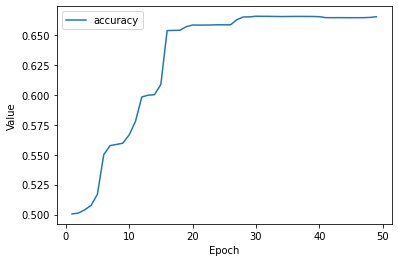

In [302]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.70

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model = build_model_simple_classification(learning_rate, feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model, train, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [303]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

70/70 [==============================] - 0s 1ms/step - loss: 0.6031 - accuracy: 0.6629


[0.6030868291854858, 0.6629486680030823]

versi bucket

In [304]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns_2 = []

# Create a bucket feature column for ap_hi.
ap_hi_as_a_numeric_column = tf.feature_column.numeric_column("ap_hi")
ap_hi_boundaries = list(np.arange(int(min(train['ap_hi'])), 
                                     int(max(train['ap_hi'])), 
                                     resolution_in_degrees))
print("ap_hi")
print(ap_hi_boundaries)
ap_hi = tf.feature_column.bucketized_column(ap_hi_as_a_numeric_column, 
                                               ap_hi_boundaries)
print(ap_hi)

feature_columns_2.append(ap_hi)

# Create a bucket feature column for ap_lo.
ap_lo_as_a_numeric_column = tf.feature_column.numeric_column("ap_lo")
ap_lo_boundaries = list(np.arange(int(min(train['ap_lo'])), 
                                      int(max(train['ap_lo'])), 
                                      resolution_in_degrees))

print("ap_lo")
print(ap_lo_boundaries)
ap_lo = tf.feature_column.bucketized_column(ap_lo_as_a_numeric_column, 
                                                ap_lo_boundaries)

print(ap_lo)

feature_columns_2.append(ap_lo)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns_2)

ap_hi
[-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5]
BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5))
ap_lo
[-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5]
BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))


Epoch 1/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.5004
Epoch 2/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6699 - accuracy: 0.5004
Epoch 3/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6496 - accuracy: 0.5129
Epoch 4/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6333 - accuracy: 0.5541
Epoch 5/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6206 - accuracy: 0.6171
Epoch 6/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6110 - accuracy: 0.7084
Epoch 7/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6039 - accuracy: 0.7084
Epoch 8/50
560/560 [==============================] - 1s 2ms/step - loss: 0.5989 - accuracy: 0.7094
Epoch 9/50
560/560 [==============================] - 1s 2ms/step - loss: 0.5951 - accuracy: 0.7095
Epoch 10/50
560/560 [==============================] - 1s 2ms/step - loss: 0.5929 - accuracy: 0.7095

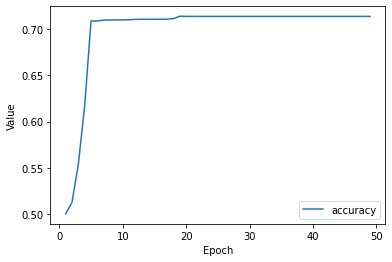

In [312]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.6

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model_2 = build_model_simple_classification(learning_rate, buckets_feature_layer, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model_2, train, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [313]:
features = {name:np.array(value) for name, value in test.items()}
label = np.array(features.pop(label_name))

my_model_2.evaluate(x = features, y = label, batch_size=batch_size)

70/70 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7170


[0.5888328552246094, 0.7170026898384094]

ada feature cross

In [315]:
resolution_in_degrees = 1.5

# Create a new empty list that will eventually hold the generated feature column.
feature_columns_3 = []

# Create a bucket feature column for ap_hi.
ap_hi_as_a_numeric_column = tf.feature_column.numeric_column("ap_hi")
ap_hi_boundaries = list(np.arange(int(min(train['ap_hi'])), 
                                     int(max(train['ap_hi'])), 
                                     resolution_in_degrees))
print("ap_hi")
print(ap_hi_boundaries)
ap_hi = tf.feature_column.bucketized_column(ap_hi_as_a_numeric_column, 
                                               ap_hi_boundaries)
print(ap_hi)

feature_columns_3.append(ap_hi)

# Create a bucket feature column for ap_lo.
ap_lo_as_a_numeric_column = tf.feature_column.numeric_column("ap_lo")
ap_lo_boundaries = list(np.arange(int(min(train['ap_lo'])), 
                                      int(max(train['ap_lo'])), 
                                      resolution_in_degrees))

print("ap_lo")
print(ap_lo_boundaries)
ap_lo = tf.feature_column.bucketized_column(ap_lo_as_a_numeric_column, 
                                                ap_lo_boundaries)

print(ap_lo)

feature_columns_3.append(ap_lo)

# Create a feature cross of ap_hi and ap_lo.
hi_x_lo = tf.feature_column.crossed_column([ap_hi, ap_lo], hash_bucket_size=96)
crossed_feature = tf.feature_column.indicator_column(hi_x_lo)
feature_columns_3.append(crossed_feature)

print("crossed")
print(crossed_feature)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer_cross = layers.DenseFeatures(feature_columns_3)

ap_hi
[-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5]
BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5))
ap_lo
[-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5]
BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))
crossed
IndicatorColumn(categorical_column=CrossedColumn(keys=(BucketizedColumn(source_column=NumericColumn(key='ap_hi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-6.0, -4.5, -3.0, -1.5, 0.0, 1.5, 3.0, 4.5)), BucketizedColumn(source_column=NumericColumn(key='ap_lo', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(-8.0, -6.5, -5.0, -3.5, -2.0, -0.5, 1.0, 2.5, 4.0, 5.5, 7.0, 8.5))), hash_bucket_size=96, h

Epoch 1/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6795 - accuracy: 0.4999
Epoch 2/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6596 - accuracy: 0.4999
Epoch 3/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6432 - accuracy: 0.4999
Epoch 4/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6298 - accuracy: 0.4999
Epoch 5/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6195 - accuracy: 0.4999
Epoch 6/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6115 - accuracy: 0.4999
Epoch 7/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6056 - accuracy: 0.4999
Epoch 8/50
560/560 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.6373
Epoch 9/50
560/560 [==============================] - 1s 2ms/step - loss: 0.5980 - accuracy: 0.6563
Epoch 10/50
560/560 [==============================] - 1s 2ms/step - loss: 0.5956 - accuracy: 0.6757

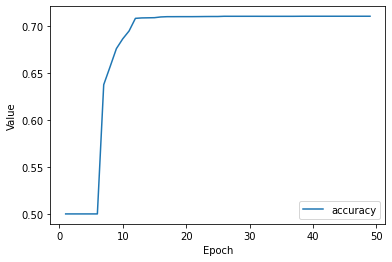

In [316]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size = 100
label_name = "cardio"
classification_threshold = 0.7

# Establish the metrics the model will measure.
METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy', 
                                           threshold=classification_threshold),
          ]

# Establish the model's topography.
my_model_3 = build_model_simple_classification(learning_rate, buckets_feature_layer_cross, METRICS)

# Train the model on the training set.
epochs, hist = train_model(my_model_3, train, epochs, 
                           label_name, batch_size)

# Plot a graph of the metric(s) vs. epochs.
list_of_metrics_to_plot = ['accuracy'] 

plot_curve(epochs, hist, list_of_metrics_to_plot)